<a href="https://colab.research.google.com/github/gaeun120312/Deeplearning/blob/main/11_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%8B%A4%EB%A3%A8%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/pima-indians-diabetes3.csv')

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False
df.head(5)

fatal: destination path 'data' already exists and is not an empty directory.


,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 정상, 당뇨환자가 각각 몇 명인지
df["diabetes"].value_counts()

In [ ]:
# 정보별 특징 더 자세히 알기
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# 각 항목별 상관관계
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


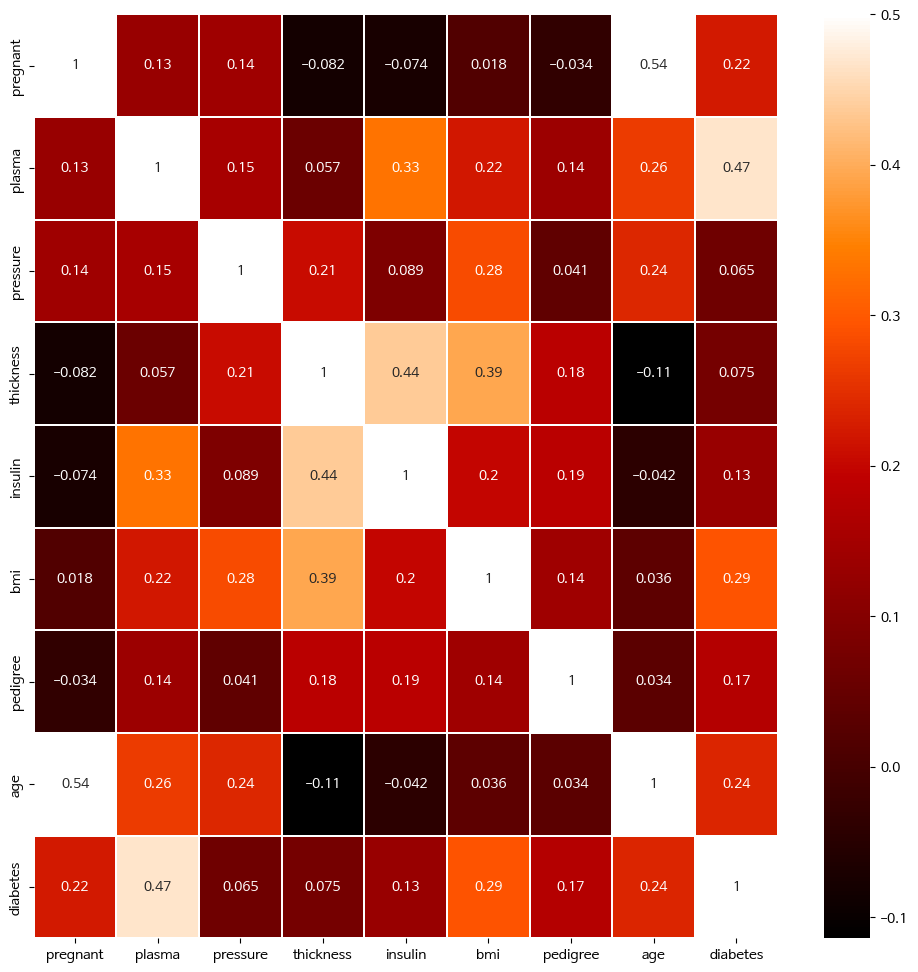

In [ ]:
# 그래프로 표현
colormap = plt.cm.gist_heat # 그래프의 색상 구성
plt.figure(figsize=(12,12)) # 그래프 크기

sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

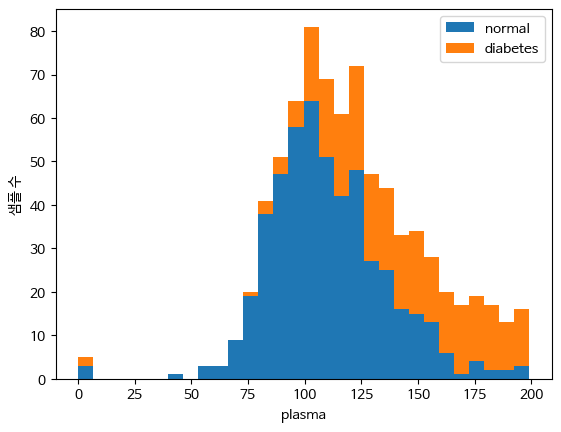

In [ ]:
# 주성분 추출
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30,
         histtype='barstacked', label=['normal', 'diabetes'])
plt.xlabel('plasma')
plt.ylabel('샘플 수')
plt.legend()

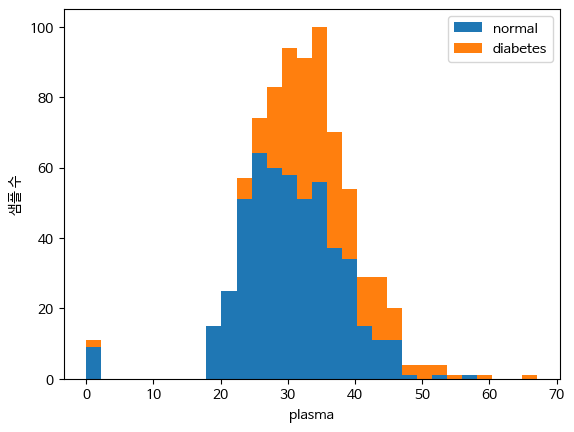

In [ ]:
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30,
         histtype='barstacked', label=['normal', 'diabetes'])
plt.xlabel('plasma')
plt.ylabel('샘플 수')
plt.legend()

In [ ]:
!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/pima-indians-diabetes3.csv')

# 데이터 읽어오기
X = df.iloc[:, 0:8] # 세부정보를 X로 지정
y = df.iloc[:, 8] # 당뇨병 여부를 y로 지정

X.shape, y.shape

fatal: destination path 'data' already exists and is not an empty directory.


((768, 8), (768,))

In [ ]:
# 모델 생성
# 은닉층 2개(첫번째 노드수 12개, 두번째 노드수 8개), 입력변수 8개, 활성화 함수-relu
# 출력층 노드수 1개, 활성화 함수-sigmoid
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid', name='Dense_3'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_2 (Dense)             (None, 8)                 104       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
history = model.fit(X, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 2s 3ms/step - loss: 0.9584 - accuracy: 0.5469
Epoch 2/100
154/154 [==============================] - 1s 3ms/step - loss: 0.6970 - accuracy: 0.6328
Epoch 3/100
154/154 [==============================] - 1s 4ms/step - loss: 0.6679 - accuracy: 0.6380
Epoch 4/100
154/154 [==============================] - 1s 4ms/step - loss: 0.6501 - accuracy: 0.6510
Epoch 5/100
154/154 [==============================] - 1s 4ms/step - loss: 0.6409 - accuracy: 0.6693
Epoch 6/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6264 - accuracy: 0.6654
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6259 - accuracy: 0.6602
Epoch 8/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6110 - accuracy: 0.6940
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6029 - accuracy: 0.6706
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6031 - accura

24/24 [==============================] - 0s 4ms/step


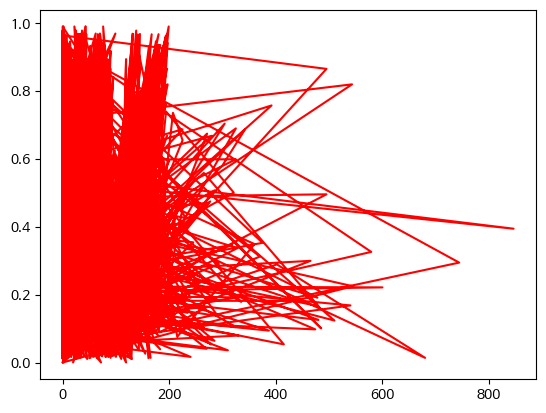

In [ ]:
# 모델 테스트 데이터 시각화
plt.plot(X, model.predict(X), 'r')
plt.show()

In [ ]:
# 모델 최종 학습 성능
history.history['accuracy'][-1]

0.7734375

In [ ]:
str(round(history.history['accuracy'][-1], 2)*100) + "%"

'77.0%'